In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_dir=r"C:\Users\Shree\Downloads\Covid19-dataset\train"
test_dir=r"C:\Users\Shree\Downloads\Covid19-dataset\test"

In [6]:
train_generator=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [7]:
test_generator=ImageDataGenerator(rescale=1.0/255)

In [8]:
width,height=512,512,
batch_size=32

In [9]:
X_train=train_generator.flow_from_directory(
    train_dir,
    target_size=(width,height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [10]:
X_test=test_generator.flow_from_directory(
    test_dir,
    target_size=(width,height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


In [11]:
model=Sequential([
    Conv2D(32,(3,3), activation="relu", input_shape=(width,height,3)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3), activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3), activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(3,activation="softmax")
    ])


In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
history=model.fit(X_train, epochs=30, batch_size=batch_size, validation_data=X_test)

Epoch 1/30


8/8 [==============================] - 204s 23s/step - loss: 1.9453 - accuracy: 0.3386 - val_loss: 1.0808 - val_accuracy: 0.3939
Epoch 2/30
8/8 [==============================] - 143s 18s/step - loss: 0.9654 - accuracy: 0.5299 - val_loss: 1.4193 - val_accuracy: 0.3788
Epoch 3/30
8/8 [==============================] - 130s 16s/step - loss: 0.7457 - accuracy: 0.6932 - val_loss: 1.9829 - val_accuracy: 0.5909
Epoch 4/30
8/8 [==============================] - 147s 19s/step - loss: 0.5740 - accuracy: 0.7849 - val_loss: 0.9942 - val_accuracy: 0.6667
Epoch 5/30
8/8 [==============================] - 129s 16s/step - loss: 0.6168 - accuracy: 0.7251 - val_loss: 1.0065 - val_accuracy: 0.6515
Epoch 6/30
8/8 [==============================] - 145s 18s/step - loss: 0.5190 - accuracy: 0.7928 - val_loss: 0.9410 - val_accuracy: 0.6364
Epoch 7/30
8/8 [==============================] - 128s 16s/step - loss: 0.4387 - accuracy: 0.7928 - val_loss: 0.6910 - val_accuracy: 0.7727
Epoch 8/30
8/8 [==

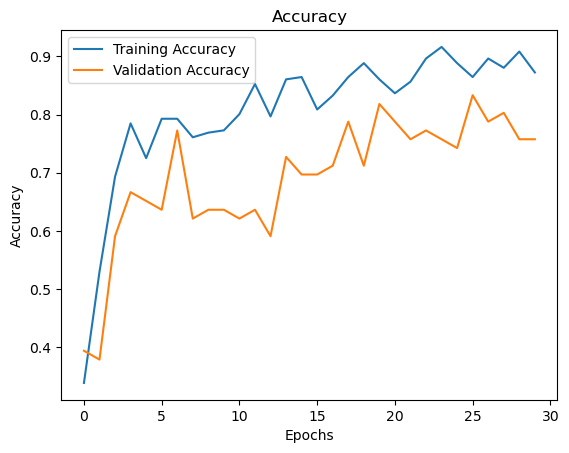

In [14]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

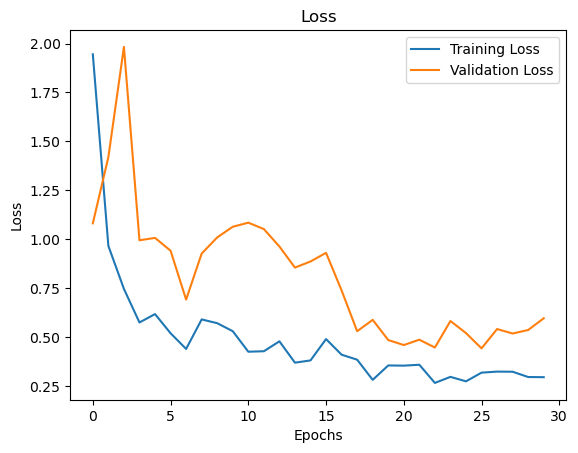

In [15]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()

In [16]:
class_names=X_test.class_indices
classes={value:key for key,value in class_names.items()}
print("Class Names", classes)

Class Names {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [17]:
from tensorflow.keras.preprocessing import image

In [23]:
img=image.load_img(r"C:\Users\Shree\Downloads\Covid19-dataset\test\Covid\0100.jpeg", target_size=(width,height))

In [24]:
img_arr=image.img_to_array(img)

In [25]:
img_arr=np.expand_dims(img_arr, axis=0)

In [26]:
img_arr=img_arr / 255.

In [29]:
model.predict(img_arr)

1/1 [==============================] - 0s 93ms/step


array([[0.9593081 , 0.02251404, 0.0181779 ]], dtype=float32)

In [30]:
pred=model.predict(img_arr)

1/1 [==============================] - 0s 109ms/step


In [31]:
np.argmax(pred)

0

In [32]:
print("The given image is of class:", classes[np.argmax(pred)])

The given image is of class: Covid
